In [1]:
from __init__ import read_from_mongo, read_from_postgre, clubs_columns, competitions_columns
import seaborn as sns
from matplotlib import pyplot as plt

# Read data from MongoDB

In [2]:
players = read_from_mongo("players")
players.head()

,_id,first_name,last_name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_id,__v
0,6574baf3975bb4cdf6a0071b,Timo,Hildebrand,2014,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,...,None,None,NaN,10000000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,24,0
1,6574baf3975bb4cdf6a0071d,Martin,Petrov,2012,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,...,None,None,NaN,12000000.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,714,0
2,6574baf3975bb4cdf6a0073a,Martin,Amedick,2012,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,...,None,None,NaN,2750000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,24,0
3,6574baf3975bb4cdf6a007a2,Jermaine,Pennant,2013,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,...,right,173,NaN,10500000.0,None,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,512,0
4,6574baf3975bb4cdf6a007ad,Damien,Duff,2013,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,...,left,177,NaN,17000000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,931,0


In [3]:
appearances = read_from_mongo("appearances")

In [4]:
lineups = read_from_mongo("gamelineups")

In [5]:
games = read_from_mongo("games")

In [6]:
valuations = read_from_mongo("playervaluations")

In [7]:
rooms = read_from_mongo("rooms")

In [8]:
users = read_from_mongo("users")

# Read data from PostgreSQL

In [9]:
clubs = read_from_postgre("clubs")
#assign to clubs columns names the array clubs_columns
clubs.columns = clubs_columns
clubs.head()
clubs.info()
#change the type of the foreigner_percentage column from object to float
clubs["foreigners_percentage"] = clubs["foreigners_percentage"].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      426 non-null    int64  
 1   average_age              388 non-null    object 
 2   club_code                426 non-null    object 
 3   coach_name               0 non-null      object 
 4   domestic_competition_id  426 non-null    object 
 5   foreigners_number        426 non-null    object 
 6   foreigners_percentage    379 non-null    object 
 7   last_season              426 non-null    object 
 8   name                     426 non-null    object 
 9   national_team_players    426 non-null    object 
 10  net_transfer_record      426 non-null    object 
 11  squad_size               426 non-null    object 
 12  stadium_name             426 non-null    object 
 13  stadium_seats            426 non-null    object 
 14  total_market_value       4

In [10]:
competitions = read_from_postgre("competitions")
competitions.columns  = competitions_columns
competitions.head()

,competition_code,_id,confederation,country_id,country_name,domestic_league_code,name,sub_type,type,url
0,italy-cup,CIT,europa,75,Italy,IT1,italy-cup,domestic_cup,domestic_cup,https://www.transfermarkt.co.uk/italy-cup/star...
1,johan-cruijff-schaal,NLSC,europa,122,Netherlands,NL1,johan-cruijff-schaal,domestic_super_cup,other,https://www.transfermarkt.co.uk/johan-cruijff-...
2,kypello-elladas,GRP,europa,56,Greece,GR1,kypello-elladas,domestic_cup,domestic_cup,https://www.transfermarkt.co.uk/kypello-ellada...
3,supertaca-candido-de-oliveira,POSU,europa,136,Portugal,PO1,supertaca-candido-de-oliveira,domestic_super_cup,other,https://www.transfermarkt.co.uk/supertaca-cand...
4,russian-super-cup,RUSS,europa,141,Russia,RU1,russian-super-cup,domestic_super_cup,other,https://www.transfermarkt.co.uk/russian-super-...


# Storing in csvs

In [11]:
players.to_csv("current_datasets/players.csv")
appearances.to_csv("current_datasets/appearances.csv")
lineups.to_csv("current_datasets/lineups.csv")
games.to_csv("current_datasets/games.csv")
valuations.to_csv("current_datasets/valuations.csv")
rooms.to_csv("current_datasets/rooms.csv")
users.to_csv("current_datasets/users.csv")
clubs.to_csv("current_datasets/clubs.csv")
competitions.to_csv("current_datasets/competitions.csv")



# Data cleaning

In [17]:
import pandas as pd

# Create a dictionary to hold the dataframes
dfs = {
    'players': players,
    'appearances': appearances,
    'lineups': lineups,
    'games': games,
    'valuations': valuations,
    'clubs': clubs,
    'competitions': competitions
}


"""# Display the head of each dataframe
for df_name, df in dfs.items():
    print(f"Head of {df_name}:")
    print(df.head())"""

for df_name, df in dfs.items():
    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    # Drop '__v' column if it exists
    if '__v' in df.columns:
        df.drop('__v', axis=1, inplace=True)
    # Convert 'createdAt' and 'updatedAt' to datetime if they exist
    if 'createdAt' in df.columns:
        df['createdAt'] = pd.to_datetime(df['createdAt'])
    if 'updatedAt' in df.columns:
        df['updatedAt'] = pd.to_datetime(df['updatedAt'])
    # Convert 'date' to datetime if it exists
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f'Missing values in {df_name}:')
    print(missing_values[missing_values > 0])
    # Check data types
    print(f'Data types in {df_name}:')
    print(df.dtypes)

Missing values in players:
Series([], dtype: int64)
Data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                    object
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
image_url                       object
url                             object
current_club_id                  int64
dtype: object
Missing values in appearances:
Series([], dtype: int64)
Data types in appearances:
_id                               object
game_id                           object
playe

The initial data cleaning has been performed on all dataframes. Here's a summary of the actions taken and findings:

Unnecessary columns such as 'Unnamed: 0' and '__v' have been removed.
Date columns like 'createdAt', 'updatedAt', and 'date' have been converted to datetime format where applicable.
Missing values have been identified in cseveral dataframes. For example, 'games.csv' has missing values in columns like 'home_club_position', 'away_club_position', 'stadium', 'attendance', 'referee', 'home_club_formation', and 'away_club_formation'.
Data types have been checked and are mostly appropriate, though some may require further inspection or conversion, such as converting 'date_of_birth' in 'players.csv' to datetime.
Next steps could include addressing the missing values, either by filling them in with appropriate values or by deciding on a case-by-case basis whether to remove rows or columns with a significant number of missing values. Additionally, we could further clean the data by standardizing text columns, checking for duplicates, and verifying the integrity of IDs and relationships between tables.

## Null values handling

In [18]:
for df_name, df in dfs.items():
    # Check for columns with a high percentage of missing values
    missing_percentage = df.isnull().sum() / len(df) * 100
    print(f'Missing value percentages in {df_name}:')
    print(missing_percentage[missing_percentage > 0])
    # Drop columns with more than 50% missing values
    columns_to_drop = missing_percentage[missing_percentage > 50].index
    df.drop(columns=columns_to_drop, inplace=True)
    # For columns with less than 50% missing, consider imputation
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode().iloc[0]).iloc[0]
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)

Missing value percentages in players:
Series([], dtype: float64)
Final data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                    object
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
image_url                       object
url                             object
current_club_id                  int64
dtype: object
Missing value percentages in appearances:
Series([], dtype: float64)
Final data types in appearances:
_id                               object
game_id 

The data types have been checked and missing values have been handled across all dataframes. Here's a summary of the actions taken:

- Columns with more than 50% missing values were dropped from the respective dataframes. For example, 'home_club_formation' and 'away_club_formation' in `games.csv` had over 96% missing values and were removed.
- Numeric columns with missing values were filled with the median of the column.
- Categorical columns with missing values were filled with the mode of the column.
- The 'coach_name' column in `clubs.csv` was dropped due to 100% missing values.

Here are some specific details for a few dataframes:

- `games.csv`: Missing values in 'home_club_position' and 'away_club_position' were around 11.39%, which were filled with the median. The 'attendance' column had 12.74% missing values, also filled with the median.
- `players.csv`: Missing values in 'first_name' and 'height_in_cm' were below 10%, filled with the mode and median respectively. The 'market_value_in_eur' column had 36.03% missing values, filled with the median.
- `competitions.csv`: The 'country_name' and 'domestic_league_code' had 16.28% missing values, which were filled with the mode.

The final data types are appropriate for the analysis, with IDs as objects, numeric values as integers or floats, and dates in datetime format.



## Type coherence checking

In [19]:
# Check and correct data types for each dataframe
for df_name, df in dfs.items():
    # Check current data types
    print(f'Current data types in {df_name}:')
    print(df.dtypes)
    # Correct data types where necessary
    # For IDs, ensure they are strings
    id_cols = [col for col in df.columns if 'id' in col or 'code' in col]
    df[id_cols] = df[id_cols].astype(str)
    # For boolean columns, ensure they are booleans
    bool_cols = [col for col in df.columns if df[col].dtype == 'object' and set(df[col].unique()) <= {'True', 'False'}]
    df[bool_cols] = df[bool_cols].astype(bool)
    # For numeric columns, ensure they are the correct numeric type
    # Convert integers stored as floats to integers
    float_cols = df.select_dtypes(include=['float']).columns
    for col in float_cols:
        if df[col].dropna().apply(float.is_integer).all():
            df[col] = df[col].astype('Int64')
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)

Current data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                    object
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
image_url                       object
url                             object
current_club_id                  int64
dtype: object
Final data types in players:
_id                            object
first_name                     object
last_name                      object
last_season                    object
player_code                    ob

# Data visualization

# Strangers graphs

<Axes: xlabel='foreigners_percentage', ylabel='name'>

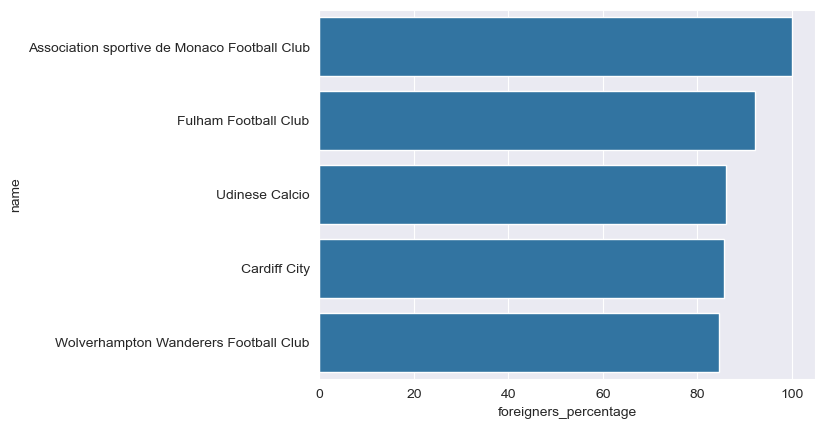

In [12]:
sns.barplot(x="foreigners_percentage", y="name", data=clubs.sort_values("foreigners_percentage", ascending=False).head())

# Players performance chart

In [13]:
performance_data = appearances.groupby('player_name')[['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].sum().head()

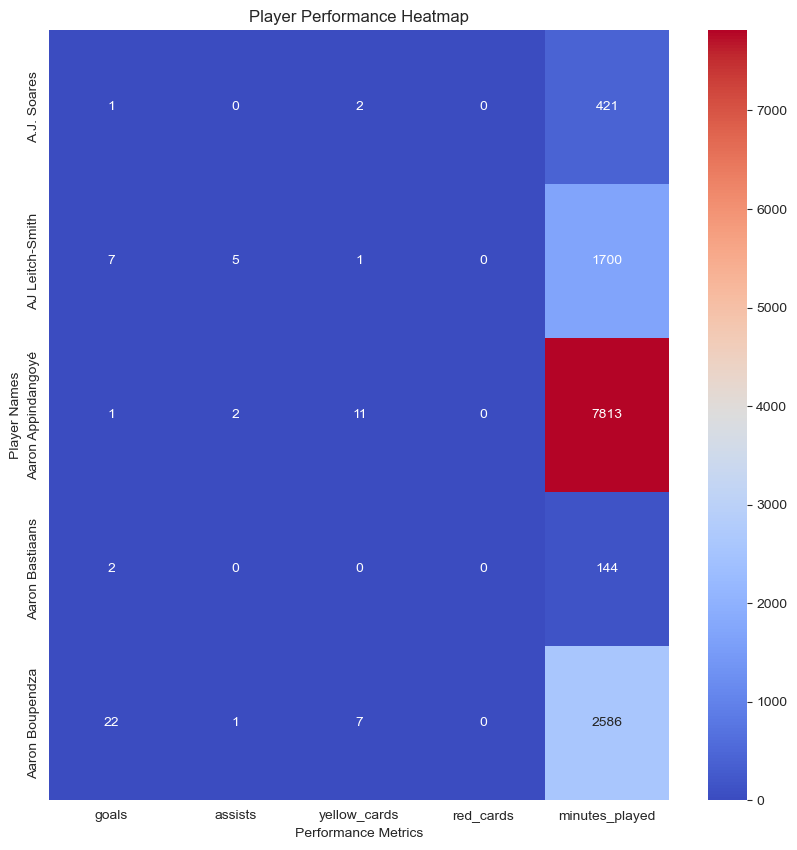

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(performance_data, annot=True, fmt="d", cmap='coolwarm')
plt.title('Player Performance Heatmap')
plt.xlabel('Performance Metrics')
plt.ylabel('Player Names')
plt.show()